*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


New Code according to datasets

## a. Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

## b. Load the training and testing data


In [2]:
train = pd.read_csv("content/mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("content/mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isnull().sum().sum()

0

In [5]:
x_train = train.drop(['label'], axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
x_train = x_train.astype('float32')/255

In [7]:
y_train = train['label'].values

## c. Define the network architecture using Keras


In [8]:
# c. Define the network architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape = (784, ) ,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## d. Train the model using SGD with 11 epochs


In [9]:
history = model.fit(x_train, y_train, epochs=11, batch_size=32, validation_split=0.2)

r = model.fit(x_train, y_train, validation_split= 0.2, batch_size = 128, epochs = 11)

Epoch 1/11
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3138 - accuracy: 0.9087 - val_loss: 0.1450 - val_accuracy: 0.9567
Epoch 2/11
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1337 - accuracy: 0.9590 - val_loss: 0.1108 - val_accuracy: 0.9658
Epoch 3/11
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0952 - accuracy: 0.9716 - val_loss: 0.0968 - val_accuracy: 0.9699
Epoch 4/11
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0861 - val_accuracy: 0.9747
Epoch 5/11
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0900 - val_accuracy: 0.9747
Epoch 6/11
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.1038 - val_accuracy: 0.9730
Epoch 7/11
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0999 - val_

In [10]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [11]:
x_test = x_test.astype('float32') / 255

## e. Evaluate the network  

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0985 - accuracy: 0.9805


## f. Plot the training loss and accuracy

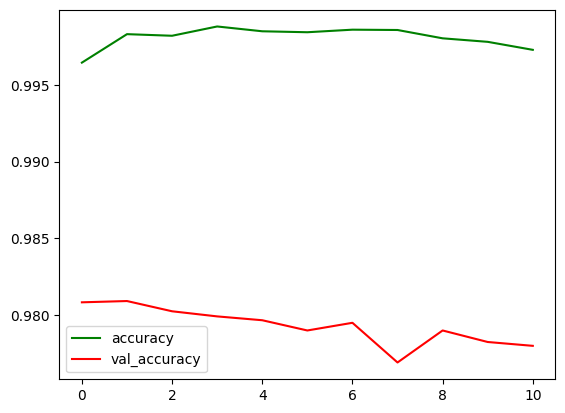

In [13]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

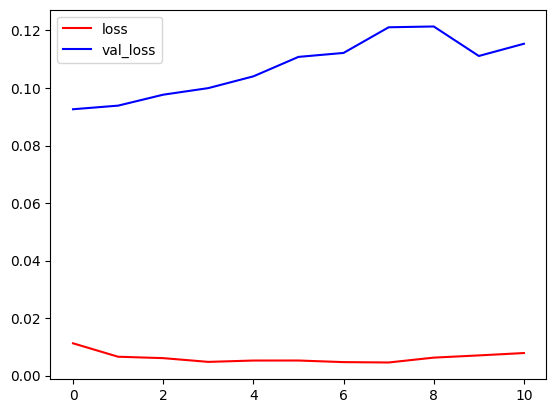

In [14]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()